# Gaussian process simulation

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as spstats
import scipy.optimize as spopt
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel

import sys

if not '../code' in sys.path:
    sys.path.append('../code')

import bayes_opt as bo
import plotting

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [128]:
def f(x, sigma=0):
    return ((x / 8) + np.sin((x ** 2) / 6) + np.cos(x - 4) / 4) + np.random.randn(*x.shape) * sigma

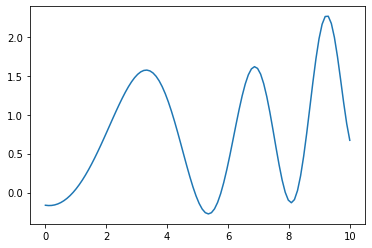

In [129]:
bounds = np.array([[0., 10.]])
xs = np.linspace(bounds[0, 0], bounds[0, 1], 100).reshape(-1, 1)
plt.plot(xs, f(xs));

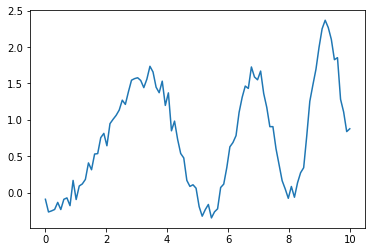

In [130]:
plt.plot(xs, f(xs, sigma=.1));

In [131]:
sigma = .2
X_init = np.array([[2], [6]])
Y_init = f(X_init, sigma=sigma)

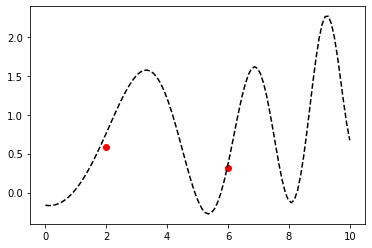

In [132]:
plt.plot(xs, f(xs), linestyle='--', color='k')
plt.scatter(X_init, Y_init, color='r')

In [133]:
rbf = RBF(length_scale=1.)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=(sigma * 2)**2)

In [134]:
xs[y_true.argmax()]

array([9.29292929])

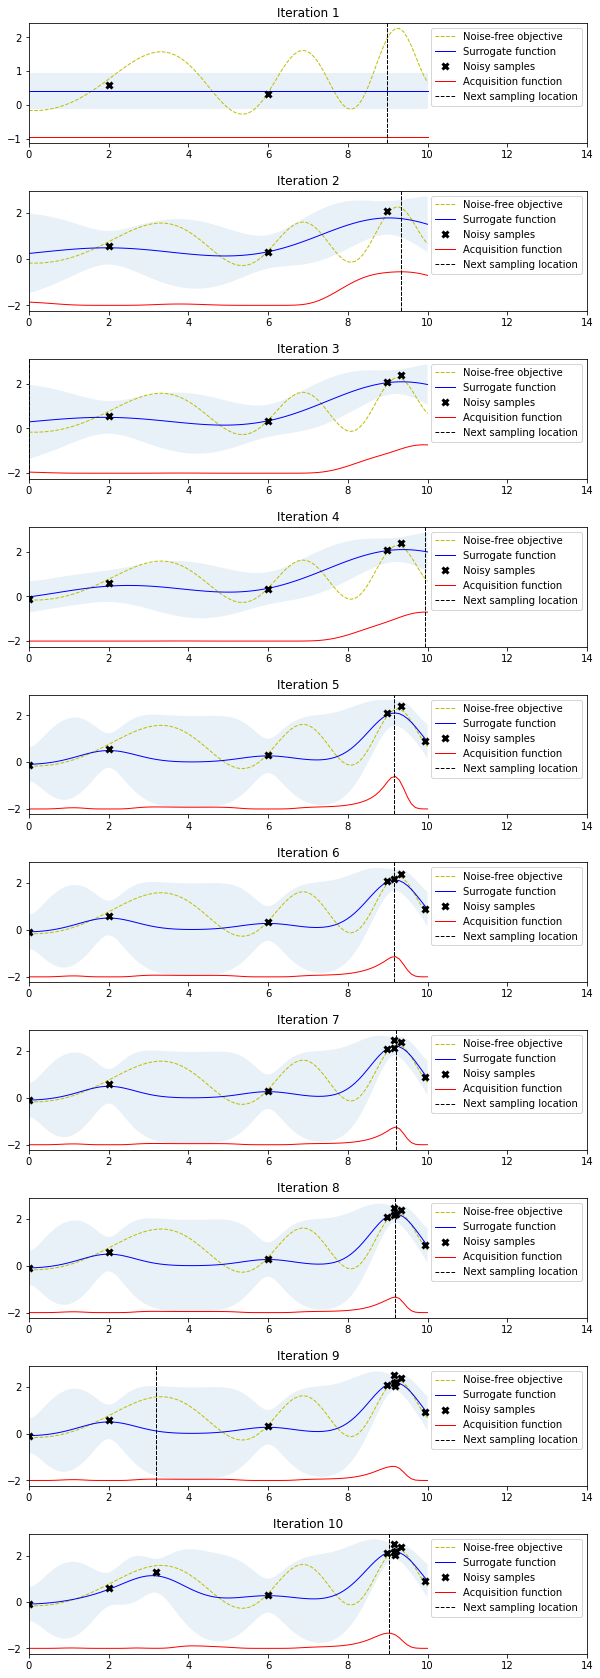

In [136]:
n_iter = 10
plt.figure(figsize=(22, n_iter * 3))
plt.subplots_adjust(hspace=.4)

y_true = f(xs, sigma=0)
X_samp, Y_samp = X_init, Y_init

for i in range(n_iter):
    gpr.fit(X_samp, Y_samp)
    X_next = bo.propose_next(bo.expected_improvement,
                             X_samp,
                             Y_samp,
                             gpr,
                             bounds)
    Y_next = f(X_next, sigma=sigma)
    
    plt.subplot(n_iter, 2, 2 * i + 1)
    plotting.plot_approximation(gpr, xs, y_true, X_samp, Y_samp, X_next)
#     plt.subplot(n_iter, 2, 2 * i + 2)
    plotting.plot_acquisition(xs, 10 * bo.expected_improvement(xs, X_samp, Y_samp, gpr) - 2, X_next)
    plt.title(f"Iteration {i + 1}")
    plt.xlim(0, xs.max() + 4)
    plt.legend()
    
    X_samp = np.vstack((X_samp, X_next))
    Y_samp = np.vstack((Y_samp, Y_next))
plt.show()